# Dataset 3 Feature Exploration

## 1. Imports and variable setup

In [1]:
# Import all libraries
import os
from roboflow import Roboflow
from IPython import display
import ultralytics
from ultralytics import YOLO
from IPython.display import display, Image
from pathlib import Path
from dotenv import find_dotenv, load_dotenv
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Check image displays are good
# display.clear_output()
sys.path.append(str(Path.cwd().parent))
# Check ultralytics library is good
ultralytics.checks()

Ultralytics YOLOv8.0.227 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
Setup complete ✅ (12 CPUs, 7.7 GB RAM, 68.2/1006.9 GB disk)


In [3]:
# Setup Project directory path
project_dir = Path.cwd().parent

# Add roboflow data to the 'external' folder
project_dir = project_dir.joinpath("data/external")
load_dotenv(find_dotenv())  # Load in Environment variables for collecting roboflow data


True

## 2. Load in Data

In [4]:
from dbdkillerai.data.make_dataset import grab_roboflow_data

# Grab third dataset. Defaults to data version 3, yolov8
rf_conn, rf_project, rf_dataset = grab_roboflow_data(project_dir=project_dir)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.227, to fix: `pip install ultralytics==8.0.196`


## 3. Feature Exploration

Class distribution
Image size
Aspect Ratio

In [5]:
rf_project.version("3").splits

{'valid': 238, 'test': 119, 'train': 1448}

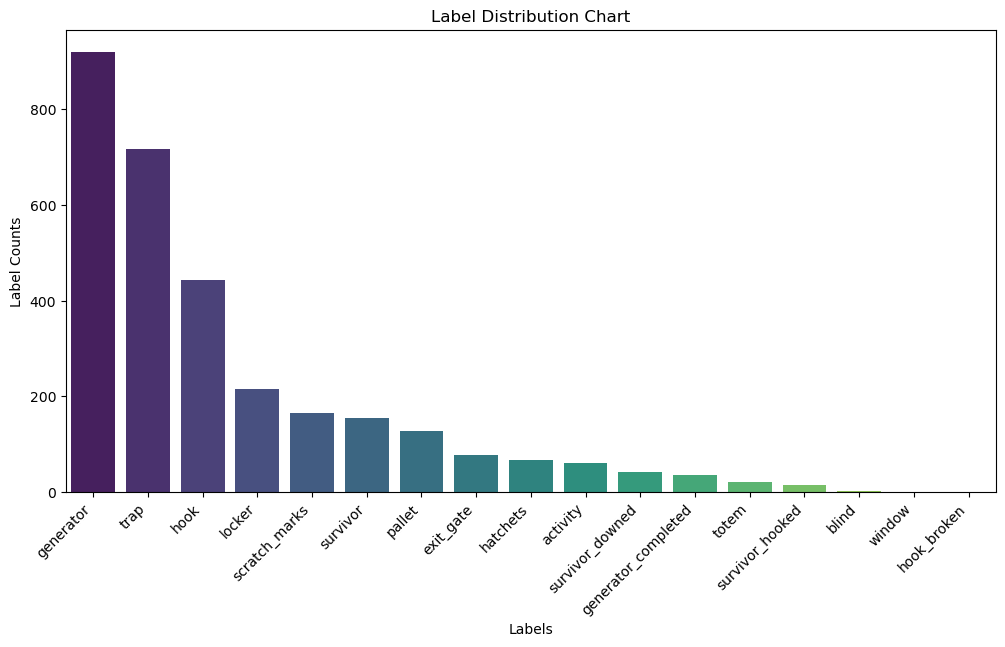

In [6]:
# Convert given classes and coutns to a pandas dataframe. Then graph it
label_counts_df = pd.DataFrame(list(rf_project.classes.items()), columns=['Label', 'Count'])
label_counts_df = label_counts_df.sort_values(by='Count', ascending=False)
# Create a distribution chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Label',
            y='Count',
            data=label_counts_df,
            palette='viridis',
            hue='Label')
plt.title('Label Distribution Chart')
plt.xlabel('Labels')
plt.ylabel('Label Counts')

# Rotate x-axis text
plt.xticks(rotation=45, ha='right')
plt.show()

In [7]:
print(f'Num images: \t {rf_project.images}')
print(f'Num images: \t {rf_project.splits}')

Num images: 	 1190
Num images: 	 {'valid': 238, 'test': 119, 'export': 0, 'train': 833}


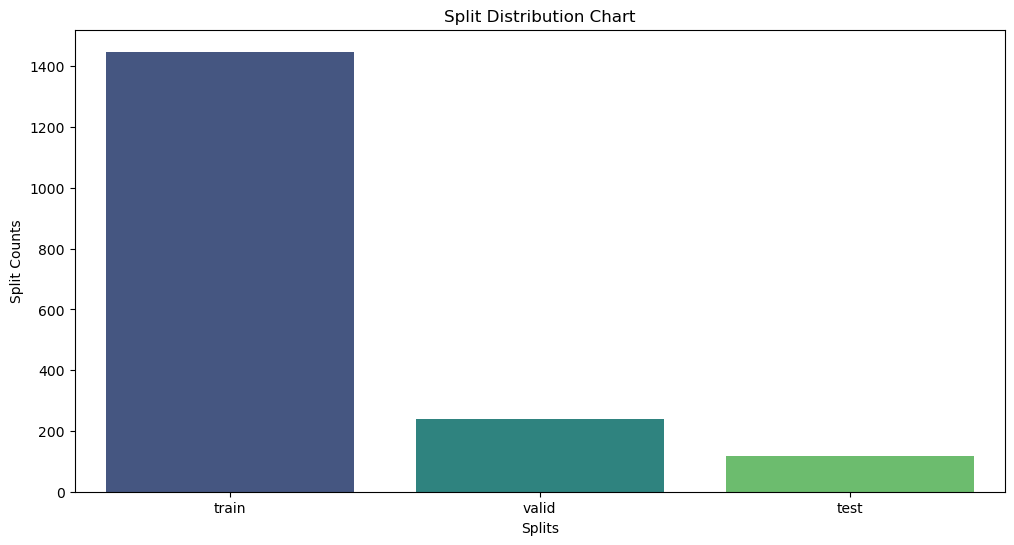

In [8]:
# Convert given classes and coutns to a pandas dataframe. Then graph it
split_counts_df = pd.DataFrame(list(rf_project.version(3).splits.items()), columns=['Split', 'Count'])
split_counts_df = split_counts_df.sort_values(by='Count', ascending=False)
# Create a distribution chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Split',
            y='Count',
            data=split_counts_df,
            palette='viridis',
            hue='Split')
plt.title('Split Distribution Chart')
plt.xlabel('Splits')
plt.ylabel('Split Counts')

# Rotate x-axis text
# plt.xticks(rotation=45, ha='right')
plt.show()